In [1]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [2]:
# Assume CIFAR data has mean 0.5 & standard deviation 0.25
x_mean = 0.5
x_sd = 0.25

In [3]:
transform = transforms.Compose([
    # Convert Pillow images to tensors
    transforms.ToTensor(),
    # Shooting for mean = 0, sd = 0.5
    transforms.Normalize((x_mean, x_mean, x_mean), (x_sd, x_sd, x_sd))
])

In [4]:
trainset = torchvision.datasets.CIFAR10(
    root="../data",
    train=True,
    download=True,
    transform=transform
)

Files already downloaded and verified


In [5]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=16,
    shuffle=True,
    num_workers=8
)

In [6]:
class_labels = np.array(trainset.classes)

In [7]:
def imshow(img):
    img = img * x_sd + x_mean
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

In [8]:
data_iter = iter(trainloader)
images, labels = next(data_iter)

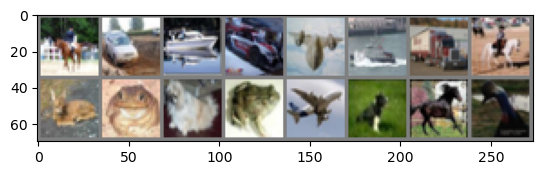

In [9]:
imshow(torchvision.utils.make_grid(images))

In [10]:
class_labels[labels.numpy()]

array(['horse', 'automobile', 'ship', 'automobile', 'airplane', 'ship',
       'truck', 'horse', 'deer', 'frog', 'dog', 'frog', 'airplane', 'dog',
       'horse', 'bird'], dtype='<U10')